<a href="https://colab.research.google.com/github/gustavogrds/TIC_01_2023/blob/main/ACD_T2_EDA_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

# Lab Análise Exploratória de Dados (EDA) 
---


## Caso: **Onde comprar imóveis em Melbourne (Austrália)?**

Empregue os dados da URL: http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv

A análise de dados tem uma grande aplicação no mercado de imóveis, seja para projetar oportunidades de negócios (como que tipo de imóvel e onde construir), seja para responder a questões mais simples (onde encontro melhores oportunidade de imóveis de 2 dormitórios). Ao final desse Lab você será capaz de responder algumas dessas perguntas explorando uma base com cerca de 35K registros sobre negócios de imóveis em Melbourne. 

# **Exercício 0.** Semântica dos Dados

Essa é uma parte importante da exploração dos dados mas as informações precisam por algum tipo de documentação dos dados. Analise algumas informações dos dados aqui...

[Melbourne Housing Market](https://www.kaggle.com/anthonypino/melbourne-housing-market)



# **Exercício 1**. Imports e Aquisição dos Dados

Faça aqui os imports para a construção da sua EDA. Em seguida faça a dos dados. Lembre-se de verificar a origem dos dados para empregar as funções e parâmetros corretos de leitura dos dados (extensão do arquivo, headers, separador etc.).




## imports

In [ ]:
# seu código
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings?

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Aquisição dos dados

In [ ]:
# seu código
houses = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')
houses.head()

# **Exercício 2**. Explore a Estrutura dos Dados

Quantos registros e atributos tem? Qual o aspecto dos dados? Quais os tipos dos dados (categóricos, numéricos)? 



In [ ]:
# seu código
houses.shape          
len(houses)           
houses.columns
houses.head()
houses.shape
houses.info
houses.dtypes

(34857, 21)

# **Exercício 3** Examine Estatísticas dos Dados Brutos

Verifique por exemplo:

1. Qual a média de preços
2. Qual o ano da construção mais antiga e a mais recente? O que você conclui? 
3. Quantas regiões há e qual a região com mais casas à venda? 


In [ ]:
# seu código
pd.options.display.max_columns = 20 
houses.describe(include='all')

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
count,34857,34857,34857.000000,34857,2.724700e+04,34857,34857,34857,34856.000000,34856.000000,...,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,34854,26881.000000,26881.000000,34854,34854.000000
unique,351,34009,NaN,3,NaN,9,388,78,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,8,NaN
top,Reservoir,5 Charles St,NaN,h,NaN,S,Jellis,28/10/2017,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,Southern Metropolitan,NaN
freq,844,6,NaN,23980,NaN,19744,3359,1119,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3675,NaN,NaN,11836,NaN
mean,NaN,NaN,3.031012,NaN,1.050173e+06,NaN,NaN,NaN,11.184929,3116.062859,...,1.624798,1.728845,593.598993,160.25640,1965.289885,NaN,-37.810634,145.001851,NaN,7572.888306
std,NaN,NaN,0.969933,NaN,6.414671e+05,NaN,NaN,NaN,6.788892,109.023903,...,0.724212,1.010771,3398.841946,401.26706,37.328178,NaN,0.090279,0.120169,NaN,4428.090313
min,NaN,NaN,1.000000,NaN,8.500000e+04,NaN,NaN,NaN,0.000000,3000.000000,...,0.000000,0.000000,0.000000,0.00000,1196.000000,NaN,-38.190430,144.423790,NaN,83.000000
25%,NaN,NaN,2.000000,NaN,6.350000e+05,NaN,NaN,NaN,6.400000,3051.000000,...,1.000000,1.000000,224.000000,102.00000,1940.000000,NaN,-37.862950,144.933500,NaN,4385.000000
50%,NaN,NaN,3.000000,NaN,8.700000e+05,NaN,NaN,NaN,10.300000,3103.000000,...,2.000000,2.000000,521.000000,136.00000,1970.000000,NaN,-37.807600,145.007800,NaN,6763.000000
75%,NaN,NaN,4.000000,NaN,1.295000e+06,NaN,NaN,NaN,14.000000,3156.000000,...,2.000000,2.000000,670.000000,188.00000,2000.000000,NaN,-37.754100,145.071900,NaN,10412.000000


Qual o ano da construção mais antiga e a mais recente? O que você conclui? 

Aqui certamente há um erro nos dados. A EDA é uma etapa importante na verificação da qualidade dos dados.

# **Exercício 4.** Verifique Dados Faltantes

Existem dados faltantes? O que você pode afirmar sobre o número de linhas com valores nulos? 

**DICA:** ` _ .isnull(). _`


In [ ]:
houses.isnull().sum()
houses.isnull().sum().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

# **Exercício 4b.** Obtenha a Média de Valores de `Price` (**RESOLVIDO**)

Em paralelo obtenha o percentual de valores nulos. O que você conclui? 


In [ ]:
houses.Price.mean()
houses.Price.isnull().sum() / houses.Price.count()

0.27929680331779644

É um percentual de valores nulos muito alto e que certamente compromete o valor da média. Por isso, mesmo em uma questão simples, é sempre bom verificar a qualidade dos dados.

# **Exercício 5**. Tratando Dados Nulos 

Antes, discuta as estratégias de tratamento de nulos para `Price`. Em seguida, por simplicidade, aplique a estratégia de imputar os valores médios para `Price` e `Landsize`.

**DICA:** `_ replace(np.NaN, _)` ou ` .fillna() `

In [ ]:
houses.Price = houses.Price.replace(np.NaN,houses.Price.mean())
houses.Landsize = houses.Landsize.fillna(houses.Landsize.mean())

1050173.344955408


# **Exercício 6** 

Por quantas Regiões estão distribuídas as casas de Melbourne? Qual o percentual da Região com mais casas vendidas?

**DICA:** use `_.unique()` , `_.value_counts()`, `.groupby()`


In [ ]:
houses.Regionname.unique()
houses.Regionname.value_counts() / len(houses) * 100

Southern Metropolitan         33.955877
Northern Metropolitan         27.417735
Western Metropolitan          19.505408
Eastern Metropolitan          12.557019
South-Eastern Metropolitan     4.988955
Eastern Victoria               0.654101
Northern Victoria              0.582379
Western Victoria               0.329919
Name: Regionname, dtype: float64

In [ ]:
houses.groupby('Regionname').Regionname.count().sort_values(ascending=False) / houses.Regionname.count() * 100

Regionname
Southern Metropolitan         33.958800
Northern Metropolitan         27.420095
Western Metropolitan          19.507087
Eastern Metropolitan          12.558100
South-Eastern Metropolitan     4.989384
Eastern Victoria               0.654157
Northern Victoria              0.582430
Western Victoria               0.329948
Name: Regionname, dtype: float64

# **Exercício 7** 

Examine a questão anterior graficamente.

**DICA:** `sns.countplot()` ou `sns.barplot`


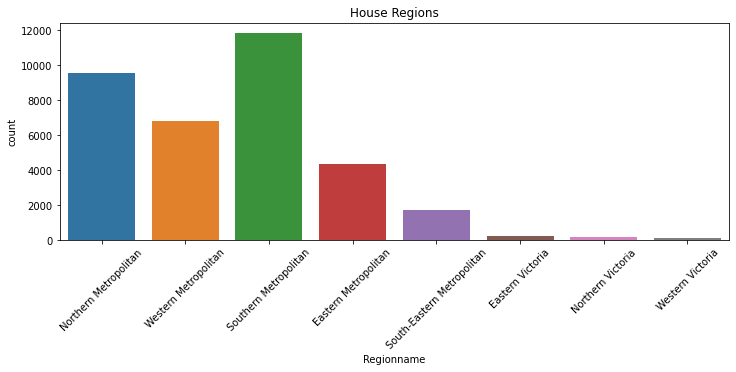

In [ ]:
plt.figure(figsize=(12,4))
sns.countplot(houses.Regionname)
plt.title('House Regions')
plt.xticks(rotation=45)
plt.show()

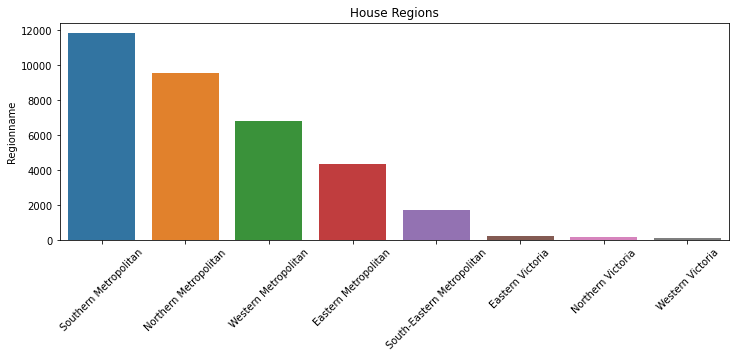

In [ ]:
# Se você quiser ir mais fundo...
plt.figure(figsize=(12,4))
sns.barplot(houses.Regionname.value_counts().index,houses.Regionname.value_counts())
plt.title('House Regions')
plt.xticks(rotation=45)
plt.show()

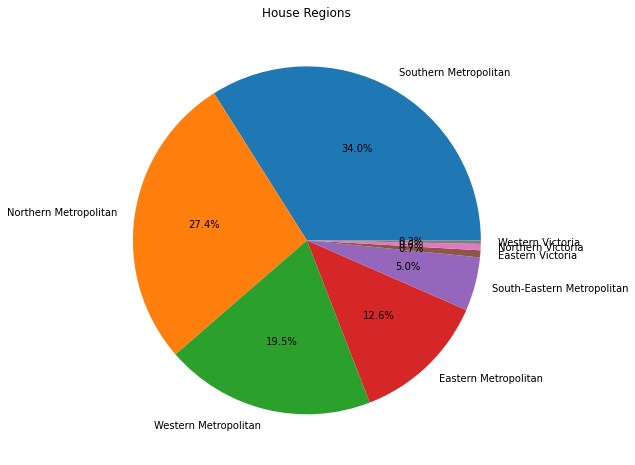

In [ ]:
# Veja que um gráfico de barras é melhor
plt.figure(figsize=(8,8))
plt.pie(houses.Regionname.value_counts(),
        labels=houses.Regionname.value_counts().index,
        autopct='%1.1f%%')
plt.title('House Regions')
plt.show()

# **Exercício 8** **(RESOLVIDO)**

Quais os 5 preços maiores e menores preços dos imóveis? 



In [ ]:
houses.Price.nlargest(5) 
houses.Price.nsmallest(5) 

4378      85000.0
29669    112000.0
17529    121000.0
3063     131000.0
3290     145000.0
Name: Price, dtype: float64

# **Exercício 9** 

Qual o maior e menor preço dos imóveis? De que região é cada um desses imóveis?



In [ ]:
houses.nlargest(1,'Price').Regionname 
houses.nsmallest(1,'Price').Regionname 

4378    Western Metropolitan
Name: Regionname, dtype: object

In [ ]:
houses.Price.min()
houses.Price.max()

houses[ houses.Price == houses.Price.min() ].Regionname
houses[ houses.Price == houses.Price.max() ].Regionname

25635    Southern Metropolitan
Name: Regionname, dtype: object

# **Exercício 10** 

Como estão distribuídos os preços dos imóveis? (Faça um gráfico)

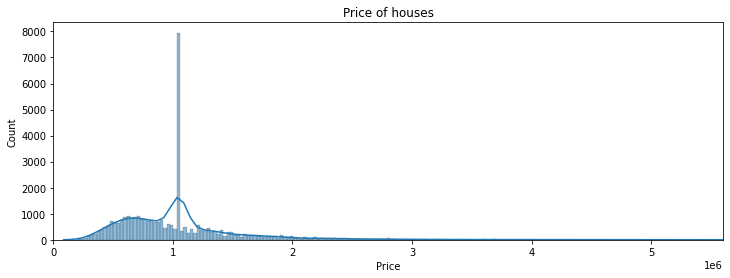

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(houses.Price,kde=True)
plt.title('Price of houses')
plt.xlim([0, 0.5*houses.Price.max()])
plt.show()

# **Exercício 11** Discussão 

Você nota algo estranho nessa distribuição? Como você corrigiria isso? 

Veja que existe um valor que se sobressai. É o valor médio que foi imputado para os valores nulos. Esse é o risco de se imputar os valores.

Uma estratégia seria a de imputar valores aleatórios com a mesma distribuição e média dos valores existentes. Algo não complexo, mas que requer alguma programação adicional. A solução está abaixo, mas não tem necessidade de você compreender o código, mas entenda ao menos o raciocínio empregado.





In [ ]:
houses2 = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Melbourne_housing_FULL.csv')
houses2.Price.isnull().sum()

7610

In [ ]:
for i in range(len(houses2)):
 if np.isnan(houses2.loc[i].Price):
    new_price = houses2.loc[np.random.randint(0,len(houses2))].Price
    while np.isnan(new_price):
      new_price = houses2.loc[np.random.randint(0,len(houses2))].Price
    houses2.at[i,'Price'] = new_price

houses2.Price.isnull().sum()

0

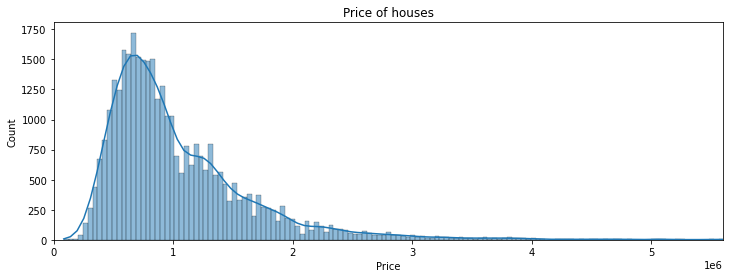

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(houses2.Price,kde=True)
plt.title('Price of houses')
plt.xlim([0, 0.5*houses2.Price.max()])
plt.show()

Mesmo assim, note que esse tipo de atribuição fará com que imóveis com mais metros quadrados e melhor região ainda possam receber um valor aleatório de um imóvel menor e de uma região menos valorizada! Neste caso uma interpolação de valores poderia fazer mais sentido. Mas não vamos seguir aqui com essa solução. Aqui o que importa é a discussão e a reflexão sobre os dados (*Data Thinking*).

# **Exercício 12**. **(RESOLVIDO)**

Compare as distribuições de preços das regiões de 'Western Metropolitan' e 'Southern Metropolitan'. O que você pode afirmar?

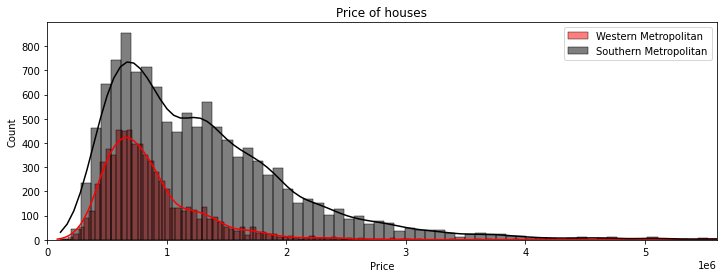

In [ ]:
# Código resolvido, você não precisa codificar nada aqui. Apenas analise e responda a pergunta.

plt.figure(figsize=(12,4))
sns.histplot(houses2[houses2.Regionname == 'Western Metropolitan'].Price,kde=True,color='r',
             label = 'Western Metropolitan')
sns.histplot(houses2[houses2.Regionname == 'Southern Metropolitan'].Price,kde=True,color='k',
             label = 'Southern Metropolitan')
plt.title('Price of houses')

plt.xlim([0, 0.5*houses2.Price.max()])
plt.legend()

plt.show()

Há mais venda de imóveis 'Southern Metropolitan' mas a distribuição de preços é bastante semelhante a da 'Western Metropolitan'.

# **Exercício 13**. **(RESOLVIDO)**

Imóveis com mais dormitórios são mais caros? Exiba em um gráfico  

**DICA:** `df.groupby()` e `sns.barplot()`

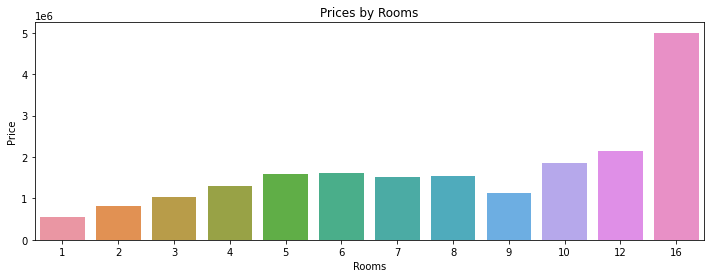

In [ ]:
housesRooms = houses.groupby('Rooms').Price.mean()

plt.figure(figsize=(12,4))
sns.barplot(housesRooms.index, housesRooms)
plt.title('Prices by Rooms')
plt.show()

# **Exercício 14**. 

Imóveis com maior área, são mais caros? Exiba em um gráfico

**DICA:** Aqui você não pode empregar o `barplot()` (por que?). Empregue um gráfico de *dispersão* do `sns` (qual é?)

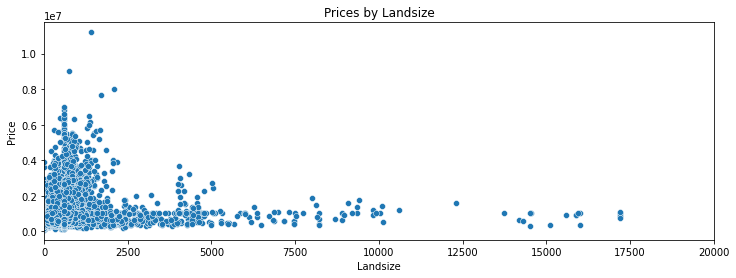

In [ ]:
plt.figure(figsize=(12,4))
sns.scatterplot(houses.Landsize, houses.Price)
plt.title('Prices by Landsize')
plt.xlim([0,20000])
plt.show()

# **Exercício 15**. **(RESOLVIDO)**

Um Cliente quer comprar um apartamento de 1 dormitório. Ele deseja comprar em uma região em que o valor do imóvel seja mais próximo dos valores de  imóveis com com 2 dormitórios, pois pretende casar no próximo ano e isso seria portanto mais cômodo para uma troca. Qual região você recomendaria o cliente comprar? 

**DICA:** 
Empregue um `boxplot()`
1. Crie um data frame somente com os registro de imóveis com 1 e 2 dormitórios
1. Faça um então um `boxplot()` do preço por região
1. Inclua o parâmetro `hue` para `Rooms` (ver Teoria Trilha 4)

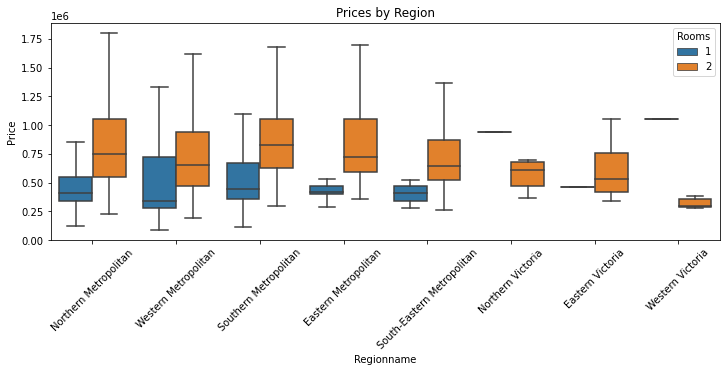

In [ ]:
houses2 = houses[houses.Rooms<=2]
plt.figure(figsize=(12,4))
sns.boxplot('Regionname','Price',data=houses2,hue='Rooms',showfliers=False)
plt.title('Prices by Region')
plt.xticks(rotation=45)
plt.show()

Na região 'Western Metropolitan' os preços de imóveis de 1 e 2 dormitórios têm mais coincidências.

# **Exercício 16**. 

Um cliente quer fazer um investimento e deseja comprar um imóvel com o maior número de cômodos. Sendo imóvel para investimento ele procura algo com a maior variabilidade possível de preço (pois pretende comprar pelo preço menor e vender daqui um ano pelo preço maior). Que tipo de imóvel você sugere ao cliente (Type = h(ouse),u(nit, ou apartamento), t(ower, sobrado)).

**DICA:** Empregue como modelo a solução do exercício anterior. 

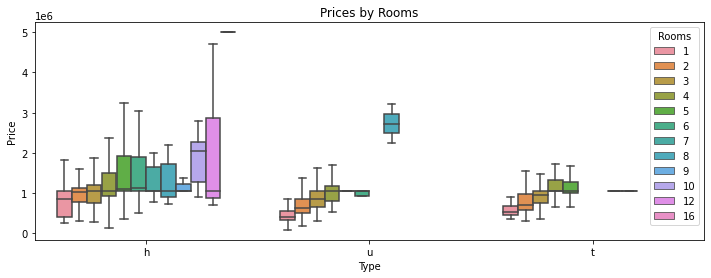

In [ ]:
plt.figure(figsize=(12,4))
sns.boxplot('Type','Price',data=houses,hue='Rooms',showfliers=False)
plt.title('Prices by Rooms')
plt.show()


Casas com mais dormitórios apresentam variabilidade maior de preço.

# **Conclusão** 

Em geral um EDA apresenta algum tipo de conclusão. Sendo aqui apenas um exercício poderíamos concluir nossa análise:

> Os imóveis da Região Sul são os mais caros havendo também a maior oferta de imóveis. O preços tem forte influência da região e as casas apresentam um espectro maior de preços (variação). A ausência de preço para um grande número de imóveis é um fator a ser revisado na análise.
